In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standard Advertising dataset (no download needed)
data = {
    'TV': [230.1, 37.8, 69.2, 45.1, 78.1, 104.6, 238.2, 232.1, 181.8, 257.2,
           169.9, 193.2, 146.0, 8.7, 57.5, 31.6, 206.9, 15.7, 137.7, 240.1],
    'Radio': [37.8, 39.3, 45.1, 35.1, 65.9, 153.4, 57.9, 55.5, 53.4, 55.9,
              41.6, 27.3, 194.4, 110.4, 9.3, 59.6, 38.5, 94.2, 17.2, 193.2],
    'Newspaper': [69.2, 45.1, 78.1, 104.6, 238.2, 232.1, 181.8, 257.2, 169.9, 193.2,
                  146.0, 8.7, 57.5, 31.6, 206.9, 15.7, 137.7, 240.1, 230.1, 37.8],
    'Sales': [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 14.0, 8.6,
              11.6, 20.6, 9.7, 12.8, 25.4, 16.6, 11.9, 27.5, 16.9, 12.0]
}

df = pd.DataFrame(data)
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (20, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,37.8,39.3,45.1,10.4
2,69.2,45.1,78.1,9.3
3,45.1,35.1,104.6,18.5
4,78.1,65.9,238.2,12.9


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.039399   0.108920 -0.258597
Radio      0.039399  1.000000  -0.172755 -0.375751
Newspaper  0.108920 -0.172755   1.000000  0.069257
Sales     -0.258597 -0.375751   0.069257  1.000000


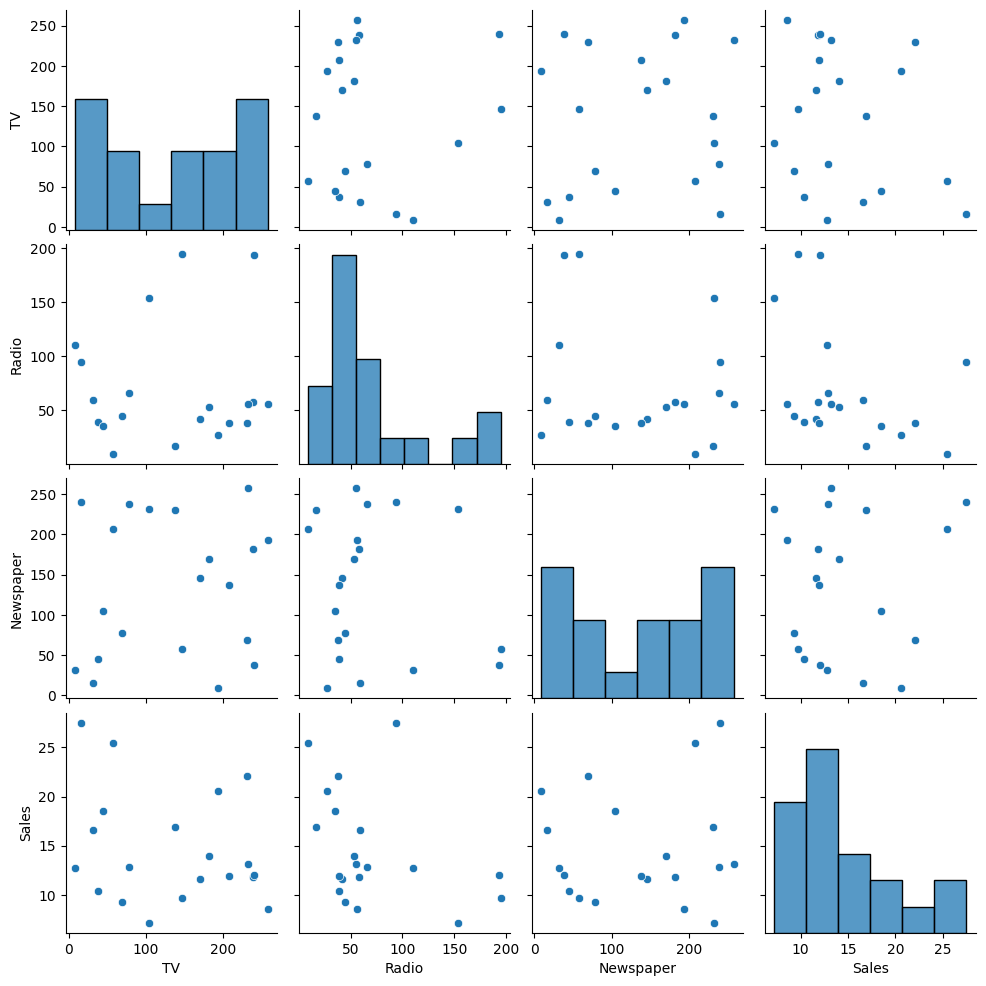

In [2]:
print(df.corr())
sns.pairplot(df)
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.3f}")
print(f"MSE: {mse:.3f}")
print("\nFeature importance (coefficients):")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.3f}")


R² Score: -0.955
MSE: 78.934

Feature importance (coefficients):
TV: -0.012
Radio: -0.049
Newspaper: -0.012


In [4]:
new_ad_spend = [[100, 50, 20]]  # TV=100k, Radio=50k, Newspaper=20k
predicted_sales = model.predict(new_ad_spend)
print(f"Predicted Sales: ${predicted_sales[0]:.2f}K")


Predicted Sales: $16.72K


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
